In [407]:
## Import Necessary Functions 
import numpy as np
import matplotlib.pyplot as plt



#You will use Vine Dataset you can get the detail in the URL below
#https://archive.ics.uci.edu/ml/datasets/Wine

from sklearn.datasets import load_wine
vine = load_wine()

In [408]:
# PRINT FOR YOUR INTUITION SO YOU KNOW THE DIMENSIONS YOU ARE WORKING WITH
print(vine.data.shape) #.data contains the features
print(vine.target.shape)
print(vine.target[0]) #.target contains the target variables
print(vine.target_names.shape)
print(vine.feature_names)

(178, 13)
(178,)
0
(3,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [409]:
#SPLIT THE DATA INTO TRAINING AND TESTING SET
#WHEN CALLING THE DATA use vine.data instance as well as vine.target.astype('int')
#THE SPLIT OF DATA IS UPTO YOU
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X, y = load_wine(return_X_y=True)
y = to_categorical(y)



X2_train, X2_test, y2_train, y2_test = train_test_split(X, y,random_state=104,test_size=0.3,shuffle=True)

In [410]:
X2_train.shape, X2_test.shape


((124, 13), (54, 13))

In [411]:
y2_train.shape, y2_test.shape

((124, 3), (54, 3))

In [412]:
print(y2_train)



[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0.

In [413]:
print(X2_train)

[[1.165e+01 1.670e+00 2.620e+00 ... 1.360e+00 3.210e+00 5.620e+02]
 [1.383e+01 1.570e+00 2.620e+00 ... 1.130e+00 2.570e+00 1.130e+03]
 [1.184e+01 8.900e-01 2.580e+00 ... 7.900e-01 3.080e+00 5.200e+02]
 ...
 [1.345e+01 3.700e+00 2.600e+00 ... 8.500e-01 1.560e+00 6.950e+02]
 [1.352e+01 3.170e+00 2.720e+00 ... 8.900e-01 2.060e+00 5.200e+02]
 [1.221e+01 1.190e+00 1.750e+00 ... 1.280e+00 3.070e+00 7.180e+02]]


In [414]:
import tensorflow as tf

print(tf.__version__)


2.11.0


In [415]:
input_dim = X2_train.shape[1:]
output_dim = y.shape[1]

In [416]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',input_shape=input_dim),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(output_dim, activation='softmax')
])


In [417]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [418]:
testing = model.fit(X2_train, y2_train, epochs=100)


Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 30.1028 - accuracy: 0.5591 - precision: 0.3387 - recall: 0.3387
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 17.9924 - accuracy: 0.5645 - precision: 0.3468 - recall: 0.3468
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 19.6014 - accuracy: 0.6183 - precision: 0.4274 - recall: 0.4274
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 15.0139 - accuracy: 0.6667 - precision: 0.5000 - recall: 0.5000
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 6.8271 - accuracy: 0.6613 - precision: 0.4919 - recall: 0.4919
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 4.5598 - accuracy: 0.6774 - precision: 0.5161 - recall: 0.5161
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 4.9822 - accuracy: 0.7473 - precision: 0.6210 - recall: 0.6210
Epoch 8/100
4/4 [==============================] - 0s 1ms/

In [419]:



print('\nTest accuracy:', testing.history['accuracy'])



Test accuracy: [0.5591397881507874, 0.5645161271095276, 0.6182795763015747, 0.6666666865348816, 0.6612903475761414, 0.6774193644523621, 0.7473118305206299, 0.6155914068222046, 0.6720430254936218, 0.7580645084381104, 0.6774193644523621, 0.7930107712745667, 0.7849462628364563, 0.8037634491920471, 0.8629032373428345, 0.8387096524238586, 0.8387096524238586, 0.7526881694793701, 0.774193525314331, 0.8198924660682678, 0.7849462628364563, 0.7849462628364563, 0.8467742204666138, 0.8413978219032288, 0.8118279576301575, 0.8279569745063782, 0.8602150678634644, 0.897849440574646, 0.8118279576301575, 0.9193548560142517, 0.8870967626571655, 0.9032257795333862, 0.8413978219032288, 0.8306451439857483, 0.8387096524238586, 0.8897849321365356, 0.8870967626571655, 0.9086021780967712, 0.8575268983840942, 0.7849462628364563, 0.8279569745063782, 0.8736559152603149, 0.774193525314331, 0.8225806355476379, 0.8225806355476379, 0.8252688050270081, 0.8924731016159058, 0.8118279576301575, 0.7876344323158264, 0.8413

2/2 [==============================] - 0s 3ms/step - loss: 0.2309 - accuracy: 0.9259 - precision: 0.8889 - recall: 0.8889

Test accuracy: [0.2308574914932251, 0.9259259104728699, 0.8888888955116272, 0.8888888955116272]


<function matplotlib.pyplot.show(close=None, block=None)>

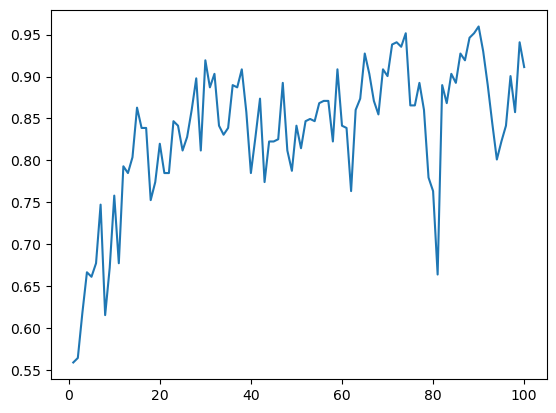

In [420]:
test_acc = model.evaluate(X2_test, y2_test)


print('\nTest accuracy:', test_acc)

plt.plot(
    np.arange(1, 101), 
    testing.history['accuracy'], label='Accuracy'
)
plt.show

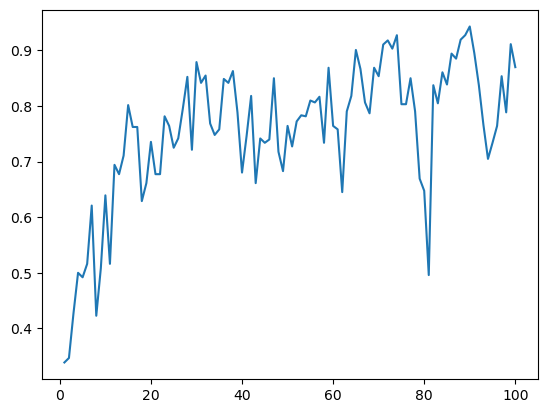

In [421]:
plt.plot(
    np.arange(1, 101), 
    testing.history['precision'], label='Precision'
)

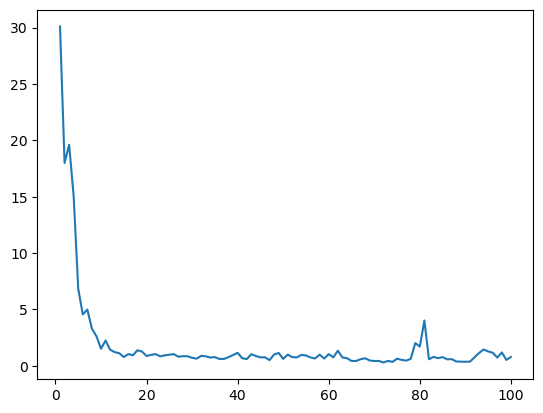

In [422]:
plt.plot(
    np.arange(1, 101), 
    testing.history['loss'], label='Loss'
)

In [423]:
model.evaluate(X2_test,y2_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9259 - precision: 0.8889 - recall: 0.8889


[0.2308574914932251,
 0.9259259104728699,
 0.8888888955116272,
 0.8888888955116272]

Accuracy: 92.59%